<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/75th_unga_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re

#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Pak-adress-.txt to Pak-adress-.txt


In [ ]:
f = open("Pak-adress-.txt", "r") #read
print(f.read())

Mr. President,
Secretary General Guterres, 
Excellencies, 
Ladies and Gentlemen,
I am honoured to address the United Nations General Assembly once again.
I congratulate His Excellency Mr. Volkan Bozkir on his election as the President of the seventy-fifth session of the General Assembly. 
We also appreciate the skilful leadership of the outgoing President, His Excellency Tijani Muhammad-Bande, especially during the COVID-19 crisis.
We commend the leadership of the Secretary General in these extremely turbulent times. 
Mr. President,
Since my government assumed office, our consistent effort has been to fundamentally transform Pakistan. 
We envisage 'Naya Pakistan' to be modeled on the principles of the State of Madinah, established by our Holy Prophet Muhammad (PBUH). 
A just and humane society where all Government policies are directed at lifting our citizens out of poverty and creating a just and equitable dispensation. 
To achieve this goal, we need to have peace and stability. Thus 

In [ ]:
df = pd.read_csv("Pak-adress-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,"Mr. President,"
1,"Secretary General Guterres,"
2,"Excellencies,"
3,"Ladies and Gentlemen,"
4,I am honoured to address the United Nations Ge...
...,...
103,I urge the Secretary-General to take the lead ...
104,He should convene Summit-level meetings to add...
105,The United Nations should be made fully respon...
106,Pakistan will continue to participate actively...


In [ ]:
import nltk #preparing data for text analysis
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean
0,mr president,"[mr, president]","[mr, president]"
1,secretary general guterres,"[secretary, general, guterres]","[secretary, general, guterres]"
2,excellencies,[excellencies],[excellencies]
3,ladies and gentlemen,"[ladies, and, gentlemen]","[ladies, gentlemen]"
4,i am honoured to address the united_nations ge...,"[i, am, honoured, to, address, the, united_nat...","[honoured, address, united_nations, general, a..."
...,...,...,...
103,i urge the secretary general to take the lead ...,"[i, urge, the, secretary, general, to, take, t...","[urge, secretary, general, take, lead, prevent..."
104,he should convene summit level meetings to add...,"[he, should, convene, summit, level, meetings,...","[convene, summit, level, meetings, address, re..."
105,the united_nations should be made fully respon...,"[the, united_nations, should, be, made, fully,...","[united_nations, made, fully, responsive, chal..."
106,pakistan will continue to participate actively...,"[pakistan, will, continue, to, participate, ac...","[pakistan, continue, participate, actively, pr..."


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df

,text,token,clean,stems
0,mr president,"[mr, president]","[mr, president]","[mr, president]"
1,secretary general guterres,"[secretary, general, guterres]","[secretary, general, guterres]","[secretary, general, guterres]"
2,excellencies,[excellencies],[excellencies],[excellency]
3,ladies and gentlemen,"[ladies, and, gentlemen]","[ladies, gentlemen]","[lady, gentleman]"
4,i am honoured to address the united_nations ge...,"[i, am, honoured, to, address, the, united_nat...","[honoured, address, united_nations, general, a...","[honour, address, united_nations, general, ass..."
...,...,...,...,...
103,i urge the secretary general to take the lead ...,"[i, urge, the, secretary, general, to, take, t...","[urge, secretary, general, take, lead, prevent...","[urge, secretary, general, take, lead, prevent..."
104,he should convene summit level meetings to add...,"[he, should, convene, summit, level, meetings,...","[convene, summit, level, meetings, address, re...","[convene, summit, level, meeting, address, reg..."
105,the united_nations should be made fully respon...,"[the, united_nations, should, be, made, fully,...","[united_nations, made, fully, responsive, chal...","[united_nations, make, fully, responsive, chal..."
106,pakistan will continue to participate actively...,"[pakistan, will, continue, to, participate, ac...","[pakistan, continue, participate, actively, pr...","[pakistan, continue, participate, actively, pr..."


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

AttributeError: ignored

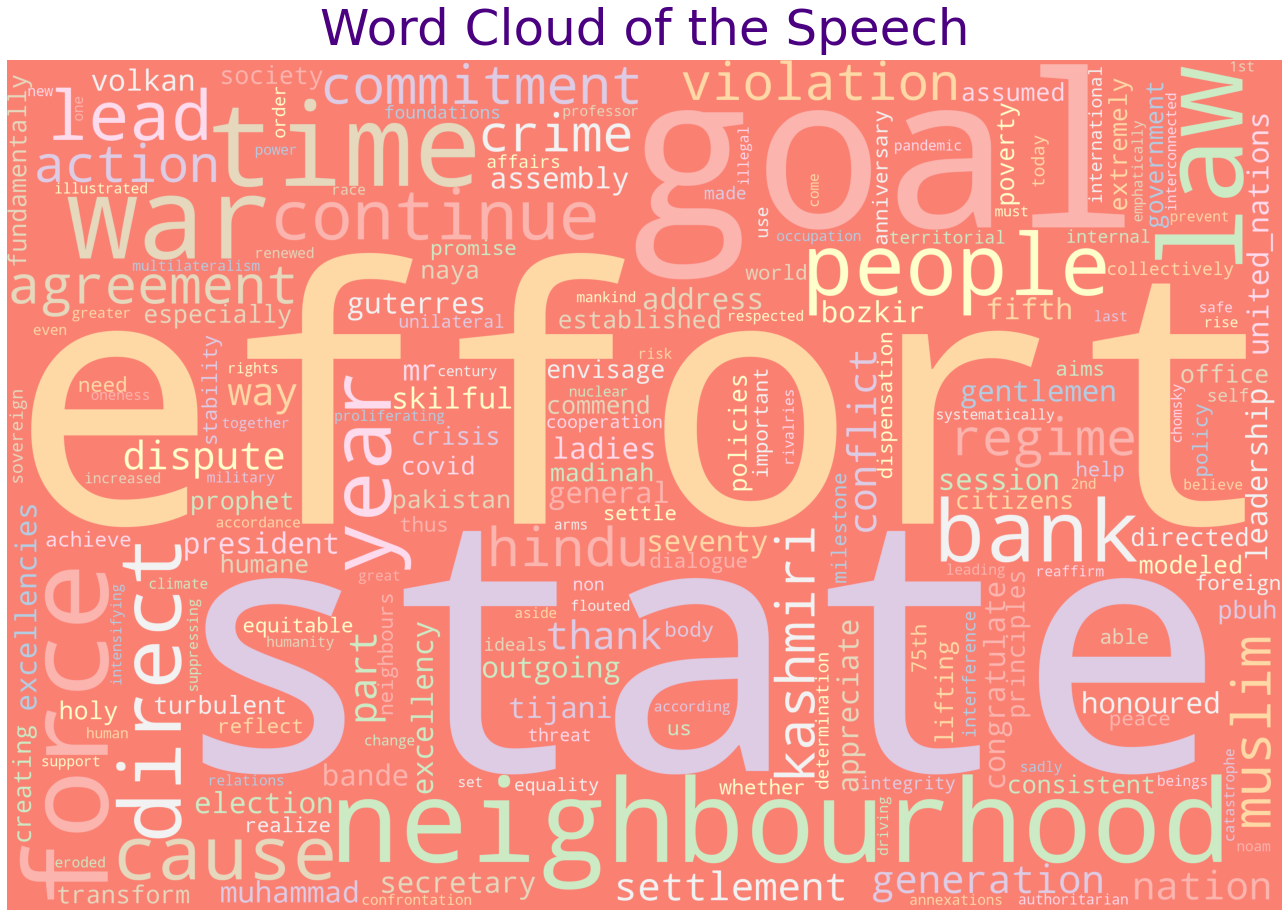

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)



plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)

In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.019*"human" + 0.015*"international" + 0.015*"rights" + 0.012*"conflicts" + 0.008*"must" + 0.008*"general" + 0.008*"world" + 0.008*"secretary" + 0.008*"beings" + 0.008*"global"')
(1, '0.015*"world" + 0.011*"self" + 0.011*"determination" + 0.011*"debt" + 0.011*"illegal" + 0.007*"states" + 0.007*"international" + 0.007*"humanity" + 0.007*"scourge" + 0.007*"safe"')
(2, '0.012*"crisis" + 0.012*"change" + 0.008*"countries" + 0.008*"climate" + 0.008*"covid" + 0.008*"sector" + 0.008*"also" + 0.008*"complete" + 0.008*"military" + 0.008*"kashmiri"')
(3, '0.013*"peace" + 0.013*"rss" + 0.013*"countries" + 0.009*"india" + 0.009*"today" + 0.009*"muslims" + 0.009*"ideology" + 0.009*"towards" + 0.009*"nazis" + 0.009*"poorest"')
(4, '0.016*"kashmir" + 0.012*"pakistan" + 0.012*"unprecedented" + 0.008*"end" + 0.008*"people" + 0.008*"imposed" + 0.008*"dispute" + 0.008*"several" + 0.008*"jammu" + 0.008*"vulnerable"')
(5, '0.021*"must" + 0.013*"council" + 0.009*"also" + 0.009*"debt" + 0.009*"take" + 

In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 20.3 MB/s 
     |████████████████████████████████| 15.7 MB 59 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=2e0c4439e655361ca4ca0ae79d8bec716f75679e76c07dbaa9431b51108b4926
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

